In [1]:
import matplotlib as mlp
#import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sn
import pandas as pd
import numpy as np
import csv

In [2]:
colors = mlp.pyplot.rcParams['axes.prop_cycle'].by_key()['color']
tool_colors = {
    "dinkel": colors[0],
    "gdbmeter": colors[1],
    "gdsmith": colors[2],
    "graphgenie": colors[3],
    "grev": colors[4],
    "gamera": colors[5],
}
tool_colors

{'dinkel': '#1f77b4',
 'gdbmeter': '#ff7f0e',
 'gdsmith': '#2ca02c',
 'graphgenie': '#d62728',
 'grev': '#9467bd',
 'gamera': '#8c564b'}

In [3]:
line_styles = {
    "dinkel": 'solid',
    "gdbmeter": 'dotted',
    "gdsmith": 'dashed',
    "graphgenie": 'dashdot',
    "grev": (0, (3, 1, 1, 1, 1, 1)),
    "gamera": (0, (1, 1)),
}

In [4]:
neo4j_data = {
    "dinkel": pd.read_csv('data/neo4j_dinkel.csv'),
    "gdbmeter": pd.read_csv('data/neo4j_gdbmeter.csv'),
    "gdsmith": pd.read_csv('data/neo4j_gdsmith.csv'),
    "graphgenie": pd.read_csv('data/neo4j_graphgenie.csv'),
    "grev": pd.read_csv('data/neo4j_grev.csv'),
    "gamera": pd.read_csv('data/neo4j_gamera.csv'),
}
neo4j_bug_timestamps = {
    "dinkel": [1721567063, 1721567092, 1721567106, 1721568247, 1721568628, 1721571419, 1721574875, 1721575642, 1721576958, 1721639787, 1721650426],
    # 2nd bug is one that was found by dinkel (timestamp 1721571419, expected a sorted plan but got...), first one was missed (comparison contract violation)
    "gdbmeter": [
        # 1721567230,
        1721680475
    ],
    "gdsmith": [],
    "graphgenie": [],
    # Same bug gdbmeter/gamera found
    "grev": [1722338594],
    # Same bug gdbmeter found
    "gamera": [1722272735],
}

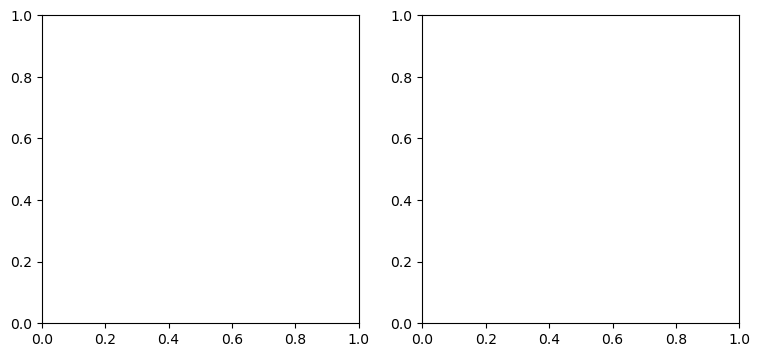

In [5]:
fig, (ax1, ax2) = mlp.pyplot.subplots(1, 2, figsize=(9,4))

Bugs for dinkel: 11
Bugs for gdbmeter: 1
Bugs for gdsmith: 0
Bugs for graphgenie: 0
Bugs for grev: 1
Bugs for gamera: 1


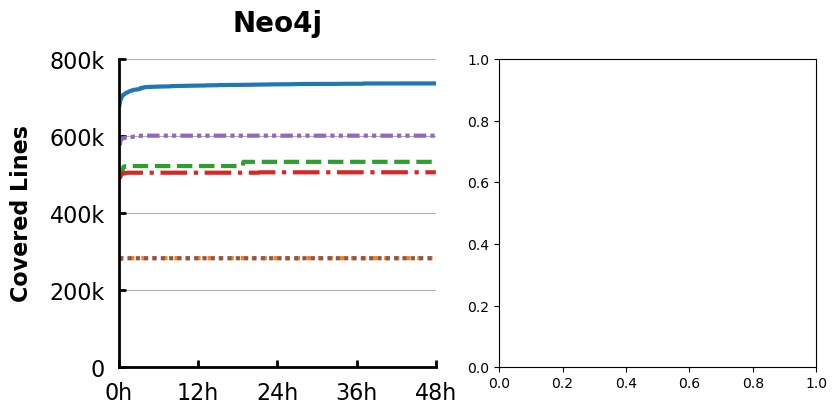

In [6]:
plt = ax1
plt.set_title("Neo4j", fontsize=20, pad=20, weight='bold')
for k, df in neo4j_data.items():
    min_time = df["time"].min()
    normalized_df = df.copy()[1:]
    normalized_df["time"] -= min_time
    normalized_df.loc[len(normalized_df)] = (48*60*60, normalized_df.iloc[-1]["lines"])

    plt.plot(normalized_df["time"], normalized_df["lines"], label=k, linewidth=3, linestyle=line_styles[k])

    print(f"Bugs for {k}: {len(neo4j_bug_timestamps[k])}")

    for bug in neo4j_bug_timestamps[k]:
        closest_idx = (normalized_df["time"] - (bug - min_time)).abs().argsort()[:1]
        #plt.scatter(bug-min_time, normalized_df.iloc[closest_idx]["lines"], c='black', marker='x', zorder=100, alpha=0.45, s=100)

#plt.set_xlabel("Time", fontsize=16, labelpad=12, fontweight='bold')
plt.set_ylabel("Covered Lines", fontsize=16, labelpad=12, fontweight='bold')


plt.set_xticks(list(range(0, 48*60*60+1, 12*60*60)), [str(i//(60*60))+"h" for i in range(0, 48*60*60+1, 12*60*60)]) #, weight='bold')
plt.set_yticks(list(range(0, 800_001, 200000)), [str(i//1000)+"k" if i != 0 else "0" for i in range(0, 800001, 200000)]) # , weight='bold')

plt.set_ylim(0, 800_000)
plt.set_xlim(0, 48*60*60)

plt.tick_params(labelsize=16, direction='in', width=2, length=5, pad=10)

plt.grid(True, axis="y")

#plt.legend(loc='lower right', fontsize=12)

plt.spines['right'].set_visible(False)
plt.spines['left'].set_linewidth(2)
plt.spines['top'].set_visible(False)
plt.spines['bottom'].set_linewidth(2)

fig

In [7]:
redisgraph_data = {
    "dinkel": pd.read_csv('data/redisgraph_dinkel.csv'),
    "gdbmeter": pd.read_csv('data/redisgraph_gdbmeter.csv'),
    "gdsmith": pd.read_csv('data/redisgraph_gdsmith.csv'),
    "graphgenie": pd.read_csv('data/redisgraph_graphgenie.csv'),
    "grev": pd.read_csv('data/redisgraph_grev.csv'),
    "gamera": pd.read_csv('data/redisgraph_gamera.csv'),
}
redisgraph_bug_timestamps = {
    # 2nd bug is the one found by gdbmeter (assertion 0 is not true)
    "dinkel": [1722183327, 1722183338, 1722183342, 1722183355, 1722183378, 1722183495, 1722183701, 1722184726, 1722186486, 1722188422, 1722191798, 1722192515, 1722196926, 1722210255, 1722221206, 1722233112, 1722235669, 1722252116],
    "gdbmeter": [1722191929],
    "gdsmith": [],
    "graphgenie": [],
    # Same bug as found by dinkel (I think first one dinkel found?) (src == dest)
    "grev": [1722250205],
    "gamera": [],
}

Bugs for dinkel: 18
Bugs for gdbmeter: 1
Bugs for gdsmith: 0
Bugs for graphgenie: 0
Bugs for grev: 1
Bugs for gamera: 0


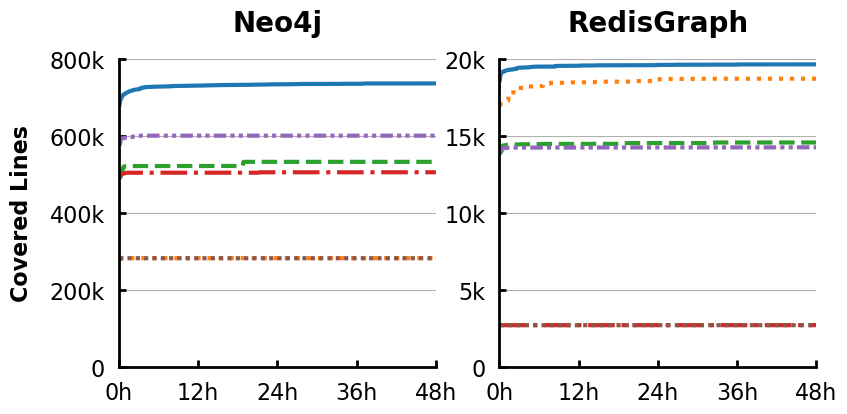

In [8]:
plt = ax2
plt.set_title("RedisGraph", fontsize=20, pad=20, weight='bold')
for k, df in redisgraph_data.items():
    min_time = df["time"].min()
    normalized_df = df.copy()[1:]
    normalized_df["time"] -= min_time
    normalized_df.loc[len(normalized_df)] = (175000, normalized_df.iloc[-1]["lines"])

    plt.plot(normalized_df["time"], normalized_df["lines"], label=k, linewidth=3, linestyle=line_styles[k])

    print(f"Bugs for {k}: {len(redisgraph_bug_timestamps[k])}")

    for bug in redisgraph_bug_timestamps[k]:
        closest_idx = (normalized_df["time"] - (bug - min_time)).abs().argsort()[:1]
        #plt.scatter(bug-min_time, normalized_df.iloc[closest_idx]["lines"], c='black', marker='x', zorder=100, alpha=0.65)

# plt.set_xlabel("Time", fontsize=16, labelpad=12, fontweight='bold')
#plt.set_ylabel("Covered Lines", fontsize=16, labelpad=12, fontweight='bold')


plt.set_xticks(list(range(0, 48*60*60+1, 12*60*60)), [str(i//(60*60))+"h" if i != 0 else "0h" for i in range(0, 48*60*60+1, 12*60*60)]) # , weight='bold')
plt.set_yticks(list(range(0, 21001, 5000)), [str(i//1000)+"k" if i != 0 else "0" for i in range(0, 21001, 5000)]) # , weight='bold')

plt.set_xlim(0, 48*60*60)
plt.set_ylim(0, 20_000)

plt.tick_params(labelsize=16, direction='in', width=2, length=5, pad=10)

plt.grid(True, axis="y")

plt.spines['right'].set_visible(False)
plt.spines['left'].set_linewidth(2)
plt.spines['top'].set_visible(False)
plt.spines['bottom'].set_linewidth(2)

fig

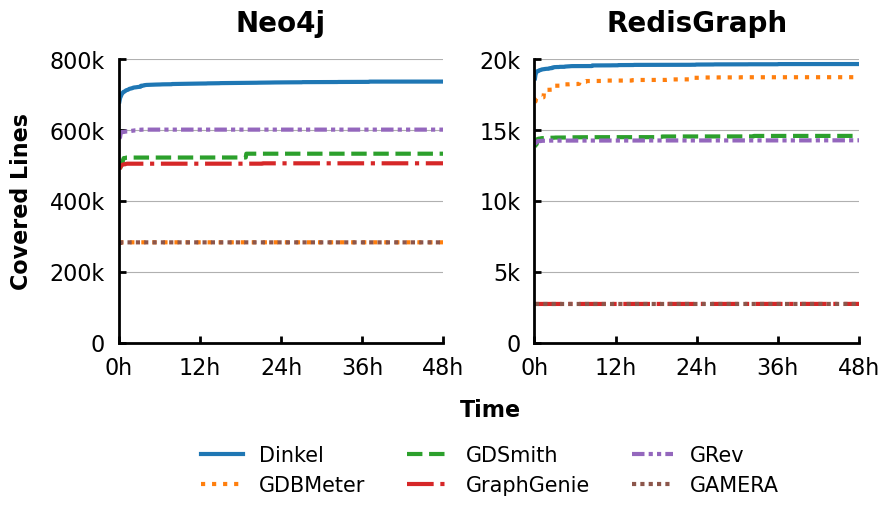

In [9]:
fig.tight_layout()
fig.suptitle("Time", x=0.55, y=-0.01, fontsize=16, fontweight='bold')
fig.legend(loc='lower center', ncols=3, labels=["Dinkel", "GDBMeter", "GDSmith", "GraphGenie", "GRev", "GAMERA"], prop={'size':15}, bbox_to_anchor=(0.55, -0.3), frameon=False)
fig.savefig('coverage.pdf', format='pdf', bbox_inches='tight')
fig

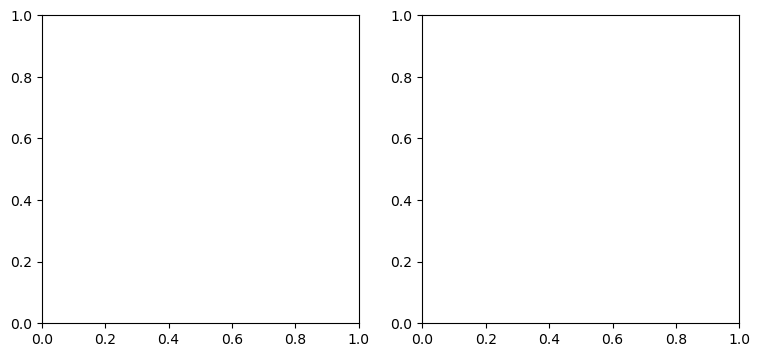

In [10]:
fig, (ax1, ax2) = mlp.pyplot.subplots(1, 2, figsize=(9,4))

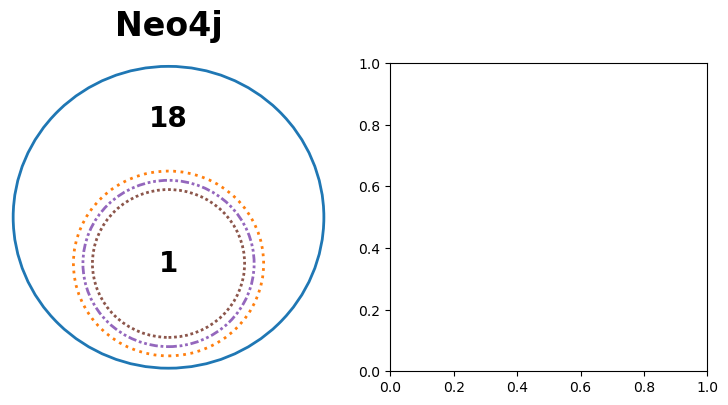

In [11]:
plt = ax1
plt.set_title("Neo4j", fontsize=24, pad=20, weight='bold')

plt.set_ylim(0, 100)
plt.set_xlim(0, 100)

plt.add_patch(mlp.patches.Circle((50, 50), radius=49, linestyle=line_styles["dinkel"],   fill=False, linewidth=2, color=tool_colors["dinkel"]))
plt.add_patch(mlp.patches.Circle((50, 35), radius=30, linestyle=line_styles["gdbmeter"], fill=False, linewidth=2, color=tool_colors["gdbmeter"]))
plt.add_patch(mlp.patches.Circle((50, 35), radius=27, linestyle=line_styles["grev"],     fill=False, linewidth=2, color=tool_colors["grev"]))
plt.add_patch(mlp.patches.Circle((50, 35), radius=24, linestyle=line_styles["gamera"],   fill=False, linewidth=2, color=tool_colors["gamera"]))

plt.text(50, 82, "18", ha='center', va='center', fontsize=20, weight='bold')
plt.text(50, 35, "1",  ha='center', va='center', fontsize=20, weight='bold')

plt.set_xticks([])
plt.set_yticks([])

plt.spines['right'].set_visible(False)
plt.spines['left'].set_visible(False)
plt.spines['top'].set_visible(False)
plt.spines['bottom'].set_visible(False)

fig

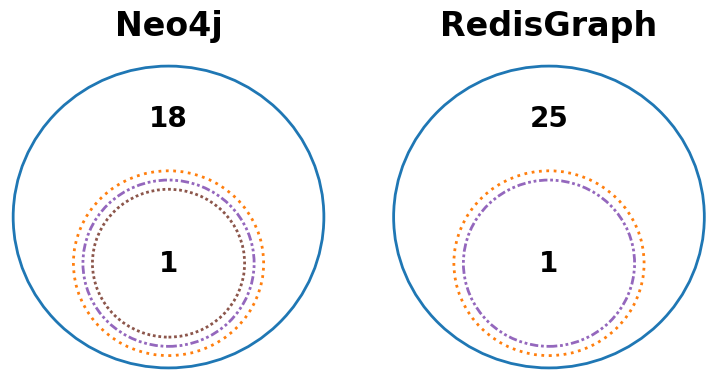

In [12]:
plt = ax2
plt.set_title("RedisGraph", fontsize=24, pad=20, weight='bold')

plt.set_ylim(0, 100)
plt.set_xlim(0, 100)

plt.add_patch(mlp.patches.Circle((50, 50), radius=49, linestyle=line_styles["dinkel"],   fill=False, linewidth=2, color=tool_colors["dinkel"]))
plt.add_patch(mlp.patches.Circle((50, 35), radius=30, linestyle=line_styles["gdbmeter"], fill=False, linewidth=2, color=tool_colors["gdbmeter"]))
plt.add_patch(mlp.patches.Circle((50, 35), radius=27, linestyle=line_styles["grev"],     fill=False, linewidth=2, color=tool_colors["grev"]))

plt.text(50, 82, "25", ha='center', va='center', fontsize=20, weight='bold')
plt.text(50, 35, "1",  ha='center', va='center', fontsize=20, weight='bold')

plt.set_xticks([])
plt.set_yticks([])

plt.spines['right'].set_visible(False)
plt.spines['left'].set_visible(False)
plt.spines['top'].set_visible(False)
plt.spines['bottom'].set_visible(False)

fig

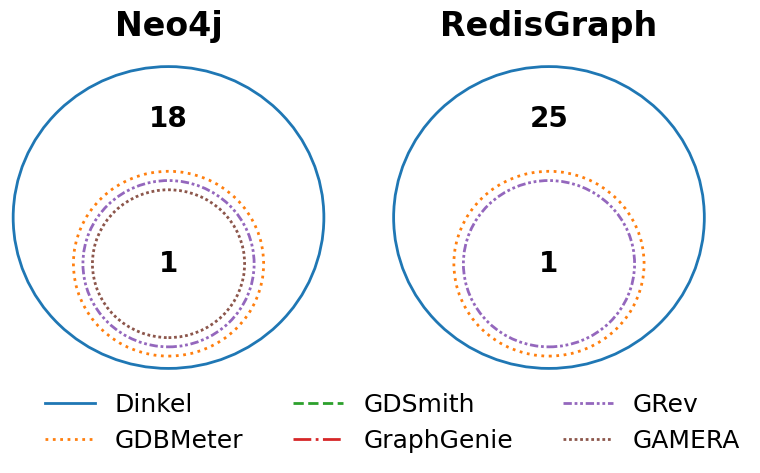

In [13]:
fig.legend(loc='lower center', ncols=3, handles=[mlp.lines.Line2D([0,1],[0,1],linestyle=line_styles[i], color=tool_colors[i], linewidth=2) for i in line_styles], labels=["Dinkel", "GDBMeter", "GDSmith", "GraphGenie", "GRev", "GAMERA"], prop={'size':18}, bbox_to_anchor=(0.55, -0.15), frameon=False)
fig.savefig('bugs.pdf', format='pdf', bbox_inches='tight')
fig

In [14]:
def plot(db, name, ax):
    df0 = pd.read_csv(f'data/{db}_{name}.csv' )[1:]
    df1 = pd.read_csv(f'data/{db}_{name}1.csv')[1:]
    df2 = pd.read_csv(f'data/{db}_{name}2.csv')[1:]
    df3 = pd.read_csv(f'data/{db}_{name}3.csv')[1:]
    df4 = pd.read_csv(f'data/{db}_{name}4.csv')[1:]

    new_index = pd.Index(range(576))

    df0['time'] -= df0['time'].min()
    df0['time'] //= 60*5
    df1['time'] -= df1['time'].min()
    df1['time'] //= 60*5
    df2['time'] -= df2['time'].min()
    df2['time'] //= 60*5
    df3['time'] -= df3['time'].min()
    df3['time'] //= 60*5
    df4['time'] -= df4['time'].min()
    df4['time'] //= 60*5

    df0.set_index('time')
    df1.set_index('time')
    df2.set_index('time')
    df3.set_index('time')
    df4.set_index('time')

    df0 = df0.reindex(new_index).ffill()
    df1 = df1.reindex(new_index).ffill()
    df2 = df2.reindex(new_index).ffill()
    df3 = df3.reindex(new_index).ffill()
    df4 = df4.reindex(new_index).ffill()

    combined_df = pd.concat([df0, df1, df2, df3, df4], join="inner", axis=1)

    print(db, name, "mean", combined_df['lines'].stack().mean(), "std", combined_df['lines'].stack().std())

    combined_df.rename(columns={'lines':name}, inplace=True)

    sn.lineplot(combined_df[name], errorbar=None, palette=[tool_colors[name]], ax=ax, linewidth=3)

neo4j dinkel mean 735533.5558260869 std 6888.134692652009
neo4j gdbmeter mean 282935.7085217391 std 149.7922845516749
neo4j gdsmith mean 515078.7046956522 std 8568.662980551986
neo4j graphgenie mean 506333.67895652173 std 2010.1548982401537
neo4j grev mean 597099.5902608696 std 4014.3911199319136
neo4j gamera mean 282874.69669565215 std 147.62534336519343
redisgraph dinkel mean 19589.88104347826 std 120.21517086374799
redisgraph gdbmeter mean 18682.23304347826 std 335.99328116774024
redisgraph gdsmith mean 14552.295304347826 std 68.27436128373303
redisgraph graphgenie mean 2724.342608695652 std 0.8995341009329991
redisgraph grev mean 14262.126260869565 std 26.893557856424987
redisgraph gamera mean 2725.5426086956522 std 0.8995341009329991


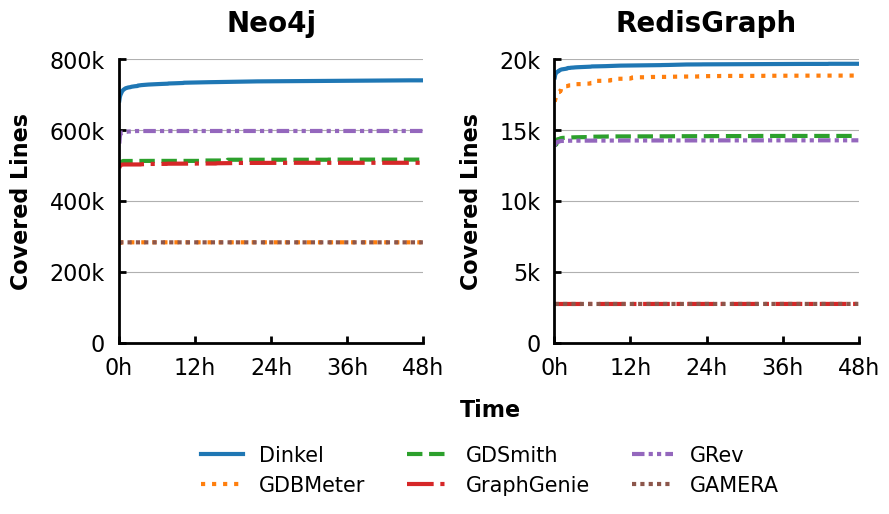

In [15]:
fig, (ax1, ax2) = mlp.pyplot.subplots(1, 2, figsize=(9,4))

ax1.set_title("Neo4j", fontsize=20, pad=20, weight='bold')
ax1.set_yticks(list(range(0, 800_001, 200000)), [str(i//1000)+"k" if i != 0 else "0" for i in range(0, 800001, 200000)]) # , weight='bold')
ax1.set_ylim(0, 800_000)
ax2.set_title("RedisGraph", fontsize=20, pad=20, weight='bold')
ax2.set_yticks(list(range(0, 21001, 5000)), [str(i//1000)+"k" if i != 0 else "0" for i in range(0, 21001, 5000)]) # , weight='bold')
ax2.set_ylim(0, 20_000)
for plt in (ax1, ax2):
    plt.set_ylabel("Covered Lines", fontsize=16, labelpad=12, fontweight='bold')

    plt.set_xticks(list(range(0, 48*12+1, 12*12)), [str(i//(12))+"h" for i in range(0, 48*12+1, 12*12)]) #, weight='bold')
    plt.set_xlim(0, 48*12)

    plt.tick_params(labelsize=16, direction='in', width=2, length=5, pad=10)

    plt.grid(True, axis="y")

    plt.spines['right'].set_visible(False)
    plt.spines['left'].set_linewidth(2)
    plt.spines['top'].set_visible(False)
    plt.spines['bottom'].set_linewidth(2)

plot('neo4j', 'dinkel'    , ax1)
plot('neo4j', 'gdbmeter'  , ax1)
plot('neo4j', 'gdsmith'   , ax1)
plot('neo4j', 'graphgenie', ax1)
plot('neo4j', 'grev'      , ax1)
plot('neo4j', 'gamera'    , ax1)

plot('redisgraph', 'dinkel'    , ax2)
plot('redisgraph', 'gdbmeter'  , ax2)
plot('redisgraph', 'gdsmith'   , ax2)
plot('redisgraph', 'graphgenie', ax2)
plot('redisgraph', 'grev'      , ax2)
plot('redisgraph', 'gamera'    , ax2)

for i, style in enumerate(line_styles):
    ax1.lines[2*i].set_linestyle(line_styles[style])
    ax2.lines[2*i].set_linestyle(line_styles[style])

ax1.legend().remove()
ax2.legend().remove()

fig.tight_layout()
fig.suptitle("Time", x=0.55, y=-0.01, fontsize=16, fontweight='bold')
fig.legend(loc='lower center', ncols=3, labels=["Dinkel", "GDBMeter", "GDSmith", "GraphGenie", "GRev", "GAMERA"], handles=[mlp.pyplot.Line2D([0], [0], linestyle=line_styles[i], color=tool_colors[i], linewidth=3) for i in line_styles], prop={'size':15}, bbox_to_anchor=(0.55, -0.3), frameon=False)
fig.savefig('coverage5.pdf', format='pdf', bbox_inches='tight')